# Hypothesis Testing (LabTAT)

Shubham's Assignment

In [1]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
LabTAT =pd.read_csv('LabTAT.csv')
LabTAT.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [5]:
# data analysis

In [6]:
LabTAT.shape

(120, 4)

In [7]:
LabTAT.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [8]:
LabTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [9]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [10]:
Laboratory_1=LabTAT['Laboratory 1'].mean()
print('Laboratory 1 Mean = ',Laboratory_1)

Laboratory 1 Mean =  178.36158333333339


In [11]:
Laboratory_2=LabTAT['Laboratory 2'].mean()
print('Laboratory 2 Mean = ',Laboratory_2)

Laboratory 2 Mean =  178.9029166666668


In [12]:
Laboratory_3=LabTAT['Laboratory 3'].mean()
print('Laboratory 3 Mean = ',Laboratory_3)

Laboratory 3 Mean =  199.91325000000003


In [13]:
Laboratory_4=LabTAT['Laboratory 4'].mean()
print('Laboratory 4 Mean = ',Laboratory_4)

Laboratory 4 Mean =  163.6827499999999


In [14]:
print('Laboratory_1 > Laboratory_2 = ',Laboratory_1 > Laboratory_2)
print('Laboratory_2 > Laboratory_3 = ',Laboratory_2 > Laboratory_3)
print('Laboratory_3 > Laboratory_4 = ',Laboratory_3 > Laboratory_4)
print('Laboratory_4 > Laboratory_1 = ',Laboratory_4 > Laboratory_1)

Laboratory_1 > Laboratory_2 =  False
Laboratory_2 > Laboratory_3 =  False
Laboratory_3 > Laboratory_4 =  True
Laboratory_4 > Laboratory_1 =  False


In [18]:
# Visualization

<AxesSubplot:xlabel='Laboratory 1', ylabel='Density'>

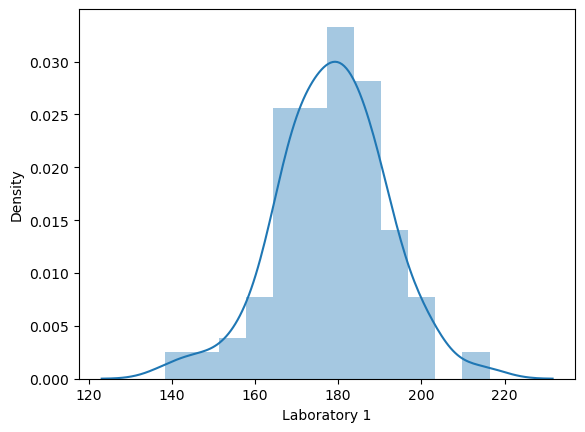

In [19]:
sns.distplot(LabTAT['Laboratory 1'])

<AxesSubplot:xlabel='Laboratory 2', ylabel='Density'>

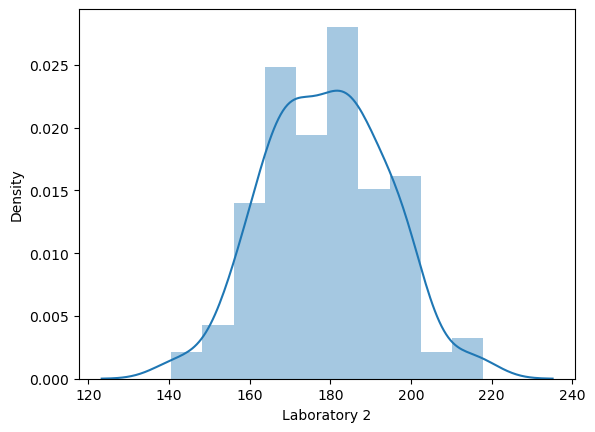

In [20]:
sns.distplot(LabTAT['Laboratory 2'])

<AxesSubplot:xlabel='Laboratory 3', ylabel='Density'>

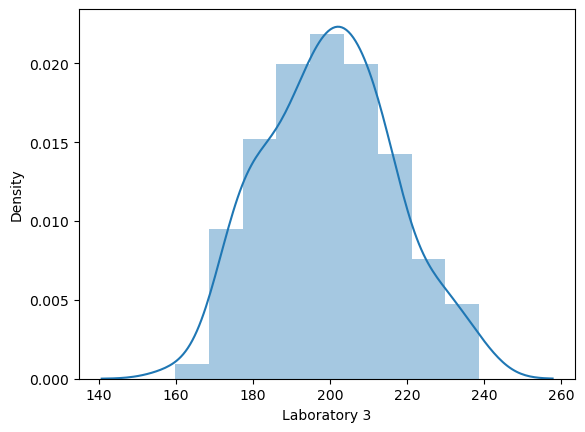

In [21]:
sns.distplot(LabTAT['Laboratory 3'])

<AxesSubplot:xlabel='Laboratory 4', ylabel='Density'>

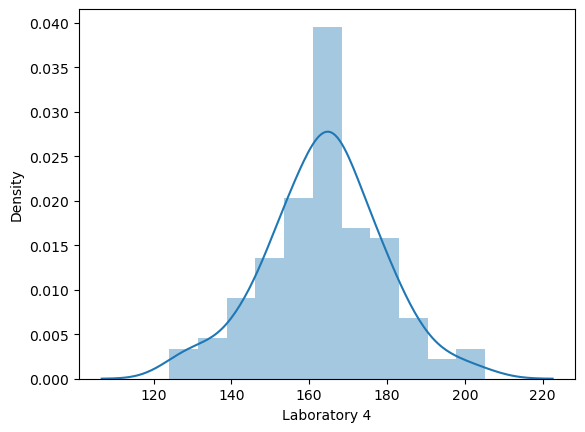

In [22]:
sns.distplot(LabTAT['Laboratory 4'])

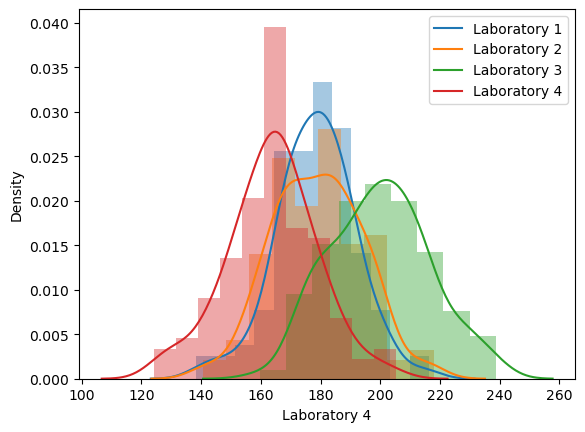

In [23]:
sns.distplot(LabTAT['Laboratory 1'])
sns.distplot(LabTAT['Laboratory 2'])
sns.distplot(LabTAT['Laboratory 3'])
sns.distplot(LabTAT['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

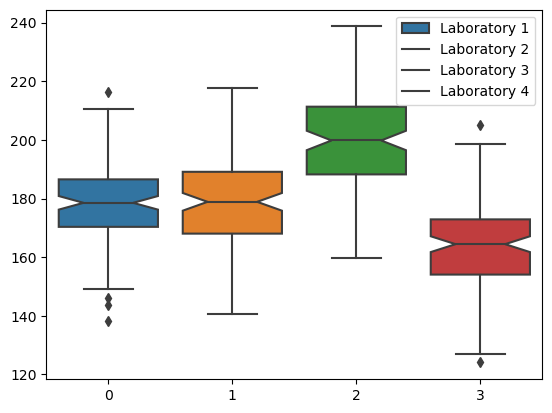

In [24]:
sns.boxplot(data=[LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4']],notch=True)
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

In [25]:
#Hypithesis Testing

In [26]:
alpha=0.05
Lab1=pd.DataFrame(LabTAT['Laboratory 1'])
Lab1

,Laboratory 1
0,185.35
1,170.49
2,192.77
3,177.33
4,193.41
...,...
115,178.49
116,176.08
117,202.48
118,182.40


In [27]:
Lab2=pd.DataFrame(LabTAT['Laboratory 2'])
Lab2

,Laboratory 2
0,165.53
1,185.91
2,194.92
3,183.00
4,169.57
...,...
115,170.66
116,183.98
117,174.54
118,197.18


In [28]:
Lab3=pd.DataFrame(LabTAT['Laboratory 3'])
Lab3

,Laboratory 3
0,176.70
1,198.45
2,201.23
3,199.61
4,204.63
...,...
115,193.80
116,215.25
117,203.99
118,194.52


In [29]:
Lab4=pd.DataFrame(LabTAT['Laboratory 4'])
Lab4

,Laboratory 4
0,166.13
1,160.79
2,185.18
3,176.42
4,152.60
...,...
115,172.68
116,177.64
117,170.27
118,150.87


In [30]:
print(Lab1,Lab2,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [31]:
tStat, pvalue = sp.stats.f_oneway(Lab1,Lab2,Lab3,Lab4)

In [32]:
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:[2.11567089e-57] T-Statistic:[118.70421654]


In [33]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


In [34]:
#Inference : There is no significant difference in the average TAT for all the labs.

In [35]:
# Done